In [1]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')

import multiprocessing as mp
import concurrent

from utils import *

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


In [2]:
# multiprocess fun for parallelizing simulations across seeds
def exp_mp(seed_exp,nseeds,gsvar=None):
  """ 
  first argument is seed_exp method
  seed_exp takes one dummy arguments
    placeholder for iterating over seeds
  seed_exp could also take second argument
    variable condition repeated over seeds 
    used for gridsearching
  """
  with concurrent.futures.ProcessPoolExecutor() as exe:
    data = exe.map(seed_exp, np.arange(nseeds), np.repeat(gsvar,nseeds))
  return np.array([i for i in data])
  

### main loop

In [14]:
agent_kw = {'gamma':1.0}
agent = ActorCritic(**agent_kw)
task_kw = {'epoch_len':2,'trlen':2}
task = PWMTaskFR(**task_kw)

neps=2
reward = -np.ones(neps)
loss = -np.ones([2,neps])
for epoch in range(neps):
  epoch_data = run_epoch_FR(agent,task)
  loss[:,epoch] = agent.update(epoch_data)
  reward[epoch] = np.sum(epoch_data['reward'])/task.ntrials
  

pi Categorical(probs: torch.Size([2, 1, 3]))
A torch.Size([2, 1])
pi Categorical(probs: torch.Size([2, 1, 3]))
A torch.Size([2, 1])


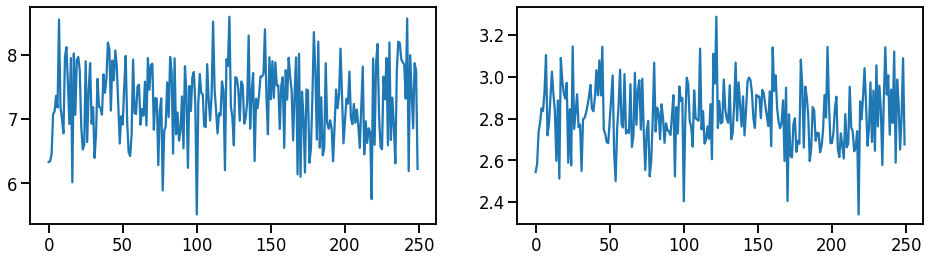

In [9]:
f,ax = plt.subplots(1,2,figsize=(16,4))
w = 20
for i in range(2):
  ax[i].plot(loss[i].reshape(w,-1).mean(0))

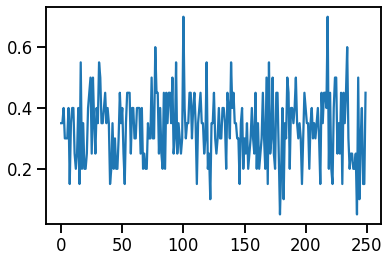

In [10]:
plt.plot(reward.reshape(w,-1).mean(0))

In [ ]:
assert False

In [ ]:
def seed_exp(_seed,gsvar=None,neps=1000):  
  agent = ActorCritic()
  task_kw = {'trlen':3}
  task = PWMTaskFR(**task_kw)

  reward = -np.ones(neps)
  for epoch in range(neps):
    epoch_data = run_epoch_FR(agent,task)
    agent.update(epoch_data)
    reward[epoch] = np.sum(epoch_data['reward'])/task.ntrials
  return reward

In [ ]:
seed_exp(_seed,gsvar)

In [ ]:
nseeds,neps = 15,15000
muL = [[0,1],[-1,0]]
sigmaL = [0.5,1,2]
mu = [-1,1]
sigma = 2

dataL = []
for gs_var in sigmaL:
  print(gs_var)
  sigma = gs_var
  
  # run over multiple seeds
  data = exp_mp(seed_exp,nseeds)
  dataL.append(data)
results = np.array(dataL)